# Getting started

This notebook demonstrates features of Anaconda Cloud for data access, notebook sharing, and application publishing.
If you are new to Python, Jupyter Notebooks, or data science you may find these resources useful:
* [Python first steps](https://learning.anaconda.cloud/python-first-steps-1)
* [Jupyter Notebook Basics](https://learning.anaconda.cloud/jupyter-notebook-basics)
* [Getting started with Anaconda](https://learning.anaconda.cloud/get-started-with-anaconda)


This notebook uses the `anaconda-panel-2023.05-py310` pre-installed conda environment. It contains many of the most commonly used packages in data science and scientific computing. Additionally, the following packages are also installed:
* Panel (version 1)
* Anaconda Catalogs

## Share your work

You can share your Jupyter notebooks with other users within the Anaconda Cloud notebook platform:

1. Click the **share** icon in the tool bar. 
2. Enter a name for your notebook, then click **OK**.
3. In the Share Link Generated dialog:

    1. Click the **Copy** icon to copy the notebook link to your clipboard. You can then share this link with whomever you want to share the notebook.
    2. Click the **Notebook** icon to copy the notebook badge to your clipboard. You can then add this badge to a webpage. 
    
Both links can be used to share your work. Users who do not have an Anaconda Cloud account who click the badge will be prompted to create an account.

<div> <img src="https://drive.google.com/uc?export=download&id=1HuZ_4DqhJi3fpwS1hXgmW14u0HMYCNAz" alt="Sharing" style="width: 700px;"/></div> 

## Load data

The Anaconda Data Catalog service provides data discovery in a JupyterLab extension and a driver for the open-source [Intake](https://intake.readthedocs.io/en/latest/index.html) framework. The [anaconda-catalogs](https://pypi.org/project/anaconda-catalogs/) driver package helps you load data from the Anaconda Catalog service into Pandas DataFrames and other Python-based data structures.

You can view the available catalogs and datasets by clicking the **Explore Catalogs** tile in the Launcher. Then, open an example notebook to see a demonstration on loading the dataset.

See the [Anaconda Cloud documentation](https://docs.anaconda.com/free/anaconda-notebooks/notebook-data-catalog/#) to learn more about the Catalog service.

<div> <img src="https://drive.google.com/uc?export=download&id=1Y7RCQ-HDISKFgAY2kfhz6fJGokngzdwH" alt="Catalogs" style="width: 700px;"/></div> 

### Example

The following commands are pulled from the **penguins** Data Catalog. Running the commands loads a table with information about the Adelie penguin:

In [1]:
import intake

Now that we have loaded the data into a Pandas DataFrame let's use [HvPlot](https://hvplot.holoviz.org/), [Holoviews](https://holoviews.org/), and [Bokeh](https://bokeh.org/) to construct interactive visuaizations. HvPlot provides convenient plotting functions from the DataFrame object, which can aid in exploratory analyses.

In [3]:
import hvplot.pandas

In [4]:
colors = {
    'Adelie Penguin': 'SteelBlue',
    'Gentoo penguin': 'DarkOrange',
    'Chinstrap penguin': 'ForestGreen'
}

scatter = penguins.hvplot.scatter('Culmen Length (mm)', 'Culmen Depth (mm)', c='Species',
                                  hover_cols=['Sex'],
                                  cmap=colors, responsive=True, min_height=300)
scatter

:Scatter   [Culmen Length (mm)]   (Culmen Depth (mm),Species,Sex)

## More sophisticated interactivity

Holoviews provides the capability to build sophisticated interactivity. In the following visualization, selections between the scatter and bar charts are linked. You can use the box selection tool in the scatter graph to select a group of points, and only those points will be represented in the bar chart below.

In [5]:
import holoviews as hv
import numpy as np

histogram = penguins.hvplot.hist('Body Mass (g)', by='Species',
                                 color=hv.dim('Species').categorize(colors), 
                                 legend=False, alpha=0.5, responsive=True, min_height=300)

ls = hv.link_selections.instance()

linked = ls(scatter.opts(show_legend=False) + histogram).cols(1)
linked

:Layout
   .Scatter.I   :DynamicMap   []
      :Overlay
         .Scatter.I   :Scatter   [Culmen Length (mm)]   (Culmen Depth (mm),Species,Sex)
         .NdOverlay.I :NdOverlay   [Element]
            :VSpan   [x,y]
         .Scatter.II  :Scatter   [Culmen Length (mm)]   (Culmen Depth (mm),Species,Sex)
   .NdOverlay.I :DynamicMap   []
      :Overlay
         .NdOverlay.I   :NdOverlay   [Species]
            :Histogram   [Body Mass (g)]   (Body Mass (g)_count)
         .NdOverlay.II  :NdOverlay   [Species]
            :NdOverlay   [Element]
               :VSpan   [x,y]
         .NdOverlay.III :NdOverlay   [Species]
            :Histogram   [Body Mass (g)]   (Body Mass (g)_count)

# Building applications with Panel

Using the Holoviews plots created above let's use [Panel](https://panel.holoviz.org) to build an interactive dashboard.

Clicking the **Render with Panel** icon in the tool bar to preview the dashboard.

> **NOTE:** The contents of the panel may take a minute to load.

<img src="https://drive.google.com/uc?export=download&id=1F_T4Me5qfTLOZtCgGCnEuuFsM4fRgFW1" alt="Preview" style="width: 700px;"/>

In [6]:
import panel as pn

def counts(selected):
    return pn.pane.Markdown(f"## {len(selected)}/{len(penguins)} penguins selected", align='center')

logo = 'https://allisonhorst.github.io/palmerpenguins/logo.png'
app = pn.template.BootstrapTemplate(logo=logo, title='Penguins crossfilter')
app.header.append(pn.bind(counts, ls.selection_param(penguins)))
app.main.append(linked)

app.servable();

## Publishing and sharing applications

To publish your Panel application a custom URL on Anaconda Cloud:

1. Click the rocket ship at the top of the notebook. The publication panel opens on the right.
2. Provide a title and detailed description.

> **NOTE:** The form displays your notebook version, which will update through iteration and redeployment.

3. Click **Publish**.
4. Click the rocket ship tab in the left-hand navigation to open the **Apps** panel. Your application is now listed under **Active**. 

<img src="https://drive.google.com/uc?export=download&id=1Soa6WUWpRGGNconEVjglSAlAs991fY9R" alt="Publish" style="width: 700px;"/>


# Learn more

* [Anaconda Catalogs](https://pypi.org/project/anaconda-catalogs/)
* [Panel/Holoviz getting started guide](https://panel.holoviz.org/getting_started/index.html)
* [Awesome Panel](https://awesome-panel.org/)
* [More example catalogs](https://github.com/holoviz/panel/tree/main/examples/gallery)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("Iris.csv")
data

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [5]:
data.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [11]:
data.isnull()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0    False          False         False          False         False    False
1    False          False         False          False         False    False
2    False          False         False          False         False    False
3    False          False         False          False         False    False
4    False          False         False          False         False    False
..     ...            ...           ...            ...           ...      ...
145  False          False         False          False         False    False
146  False          False         False          False         False    False
147  False          False         False          False         False    False
148  False          False         False          False         False    False
149  False          False         False          False         False    False

[150 rows x 6 columns]

In [13]:
data.dropna()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


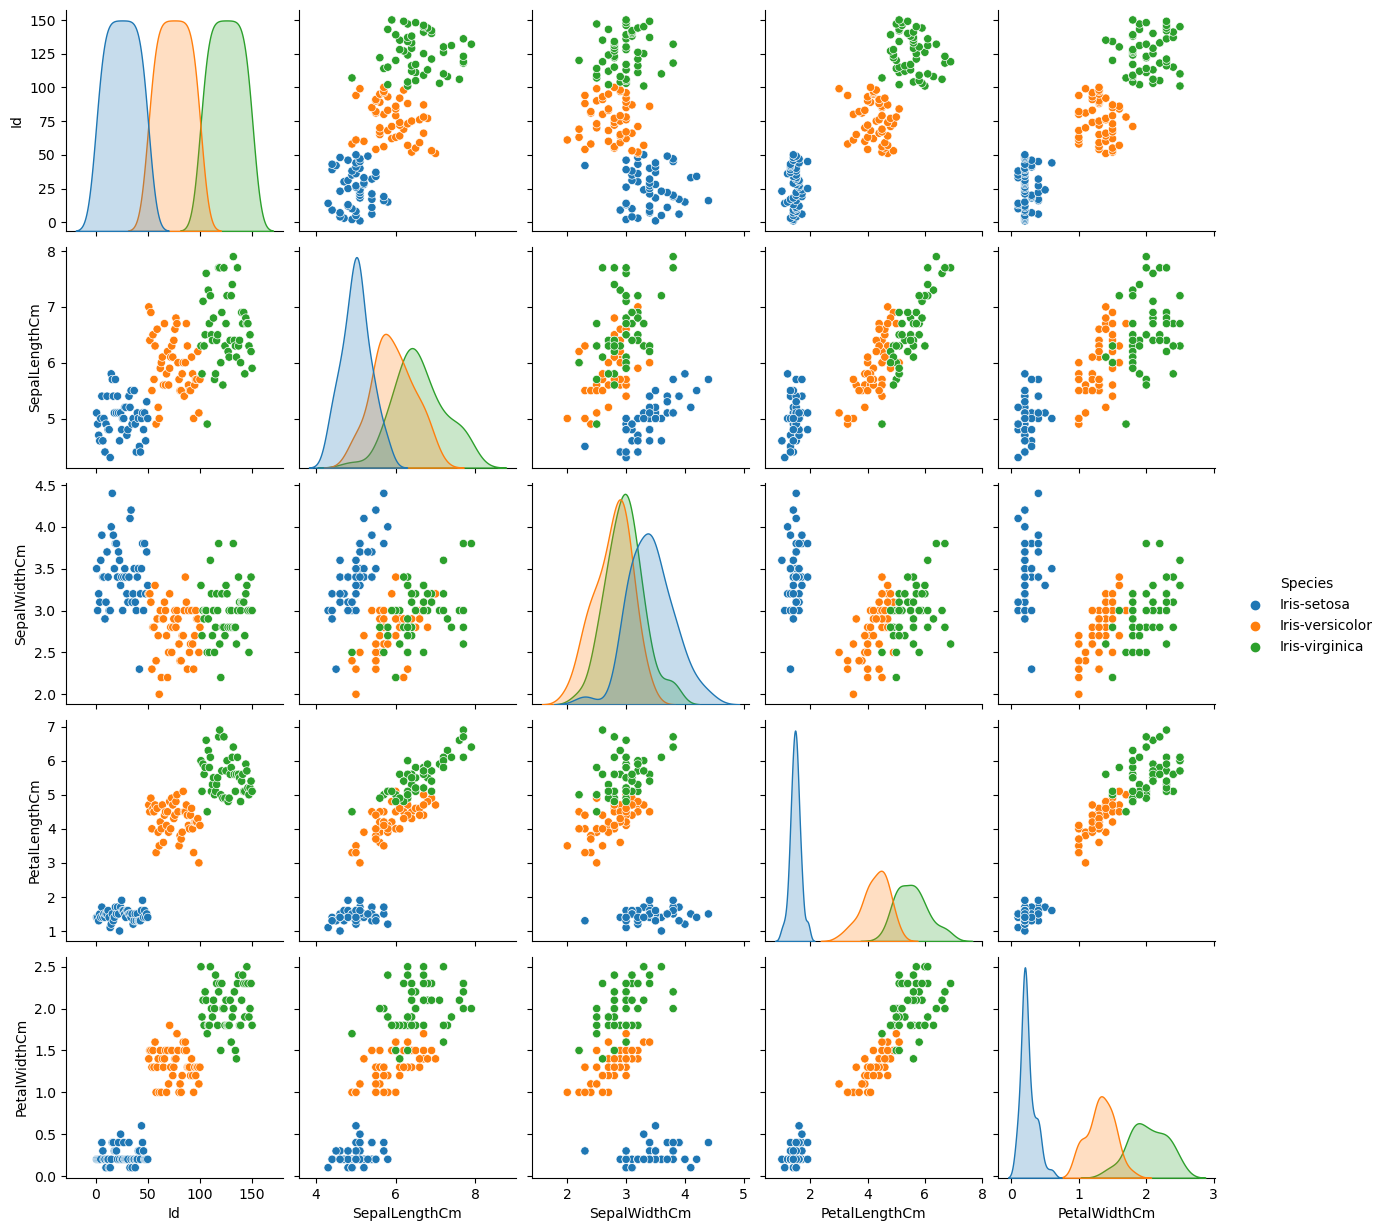

In [15]:
sns.pairplot(data=data,hue="Species")
plt.show()

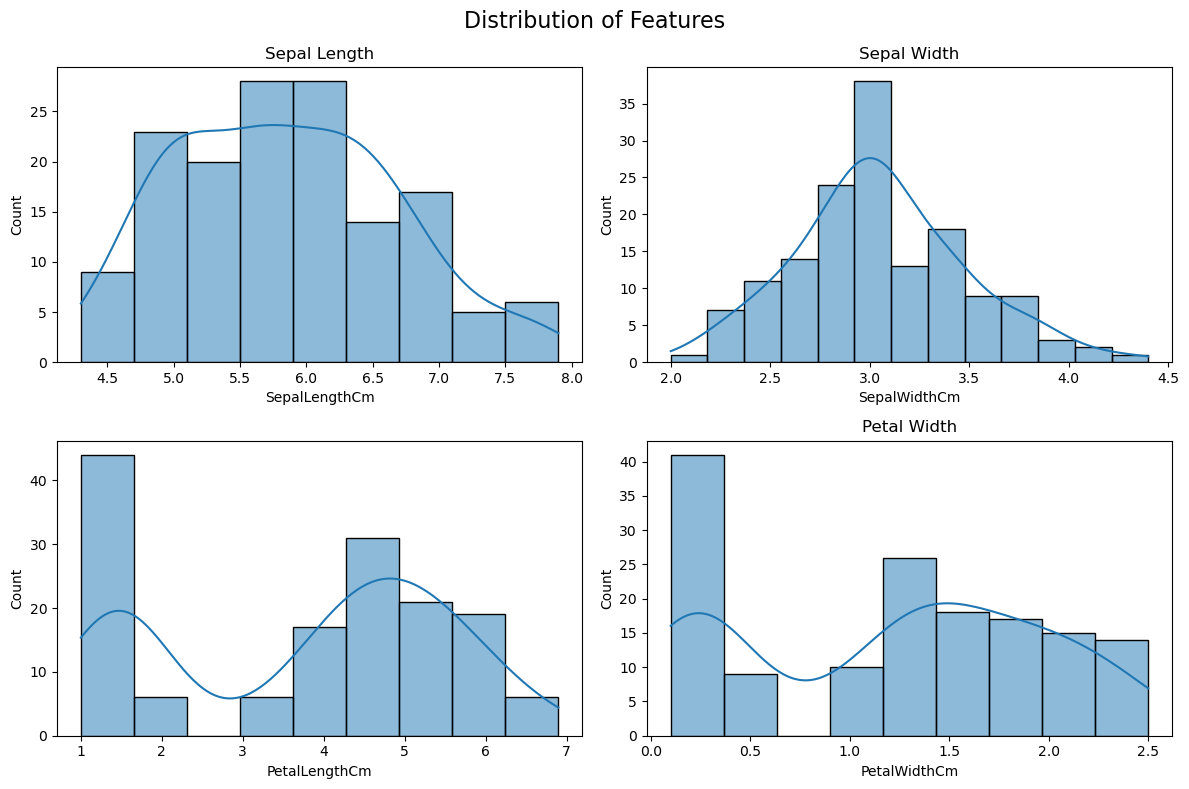

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribution of Features', fontsize=16)

sns.histplot(data['SepalLengthCm'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Sepal Length')

sns.histplot(data['SepalWidthCm'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Sepal Width')

sns.histplot(data['PetalLengthCm'], ax=axes[1, 0], kde=True)

sns.histplot(data['PetalWidthCm'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Petal Width')

plt.tight_layout()
plt.show()

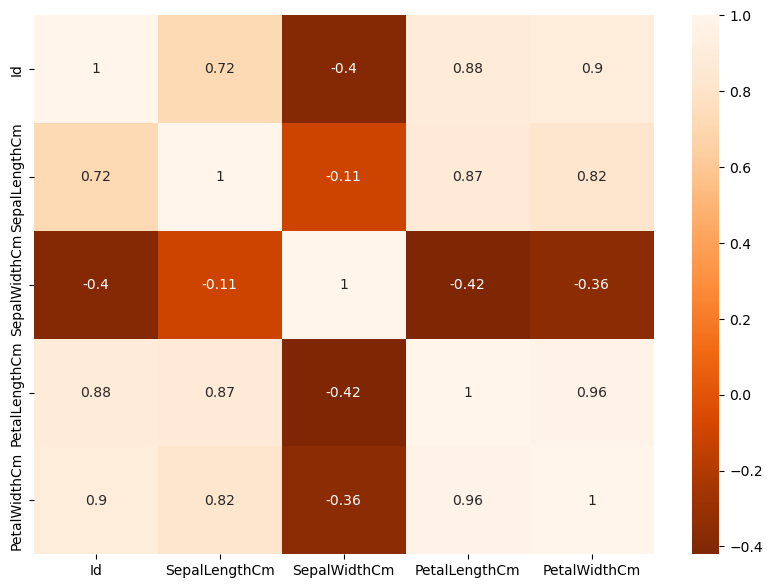

In [39]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap="Oranges_r")
plt.show()

In [35]:
df=data.drop(columns=["Species"])
df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]

In [36]:
average=data.groupby(["Species"], as_index=False)["Id"].sum().sort_values(by="Id",ascending=False)
average

Species    Id
2   Iris-virginica  6275
1  Iris-versicolor  3775
0      Iris-setosa  1275

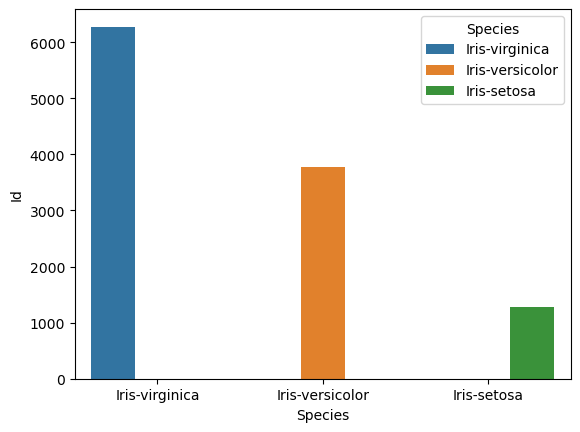

In [42]:
sns.barplot(data=average,x="Species",y="Id", hue="Species")
plt.show()

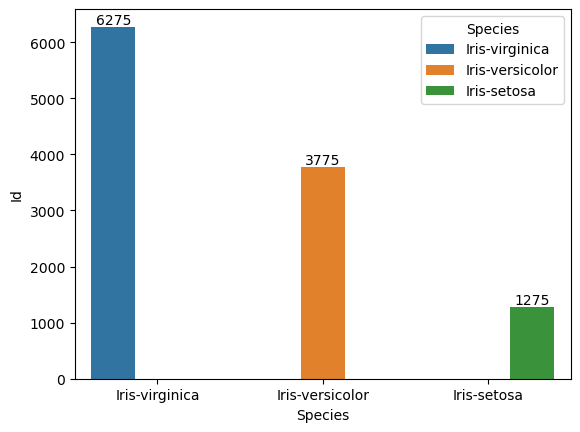

In [44]:
ax=sns.barplot(data=average,x="Species",y="Id", hue="Species")
for bars in ax.containers:ax.bar_label(bars)

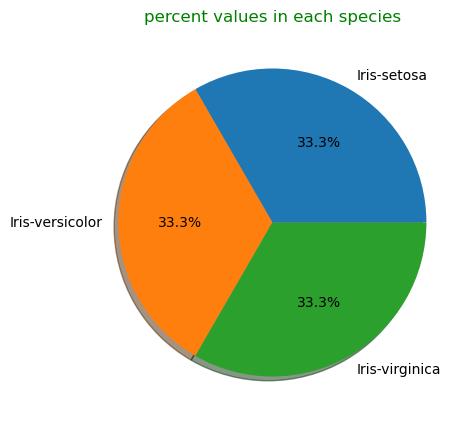

In [50]:
data["Species"]. value_counts().plot(kind="pie",autopct ="%1.1f%%", shadow=True, figsize=(5,5))
plt.title("percent values in each species", fontsize= 12, c="g")
plt.ylabel("",fontsize=10,c="r")
plt.show()

In [71]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [79]:
x.shape

(150, 5)

In [81]:
y.shape

(150,)

In [83]:
from sklearn.linear_model import LogisticRegression

In [85]:
lr=LogisticRegression()

In [91]:
lr.fit(x_train,y_train)

/home/2d17a121-d862-4e5f-8696-8e19011a0f01/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
y_pred=lr.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [105]:
x_pred=lr.predict(x_train)
x_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rfc=RandomForestClassifier()

In [109]:
X = data.drop(columns=['Species'])
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
x_test

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
73    74            6.1           2.8            4.7           1.2
18    19            5.7           3.8            1.7           0.3
118  119            7.7           2.6            6.9           2.3
78    79            6.0           2.9            4.5           1.5
76    77            6.8           2.8            4.8           1.4
31    32            5.4           3.4            1.5           0.4
64    65            5.6           2.9            3.6           1.3
141  142            6.9           3.1            5.1           2.3
68    69            6.2           2.2            4.5           1.5
82    83            5.8           2.7            3.9           1.2
110  111            6.5           3.2            5.1           2.0
12    13            4.8           3.0            1.4           0.1
36    37            5.5           3.5            1.3           0.2
9     10            4.9           3.1            1.5           0.1
19    20            5.1           3.8            1.5           0.3
56    57            6.3           3.3            4.7           1.6
104  105            6.5           3.0            5.8           2.2
69    70            5.6           2.5            3.9           1.1
55    56            5.7           2.8            4.5           1.3
132  133            6.4           2.8            5.6           2.2
29    30            4.7           3.2            1.6           0.2
127  128            6.1           3.0            4.9           1.8
26    27            5.0           3.4            1.6           0.4
128  129            6.4           2.8            5.6           2.1
131  132            7.9           3.8            6.4           2.0
145  146            6.7           3.0            5.2           2.3
108  109            6.7           2.5            5.8           1.8
143  144            6.8           3.2            5.9           2.3
45    46            4.8           3.0            1.4           0.3
30    31            4.8           3.1            1.6           0.2

In [113]:
x_train

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
22    23            4.6           3.6            1.0           0.2
15    16            5.7           4.4            1.5           0.4
65    66            6.7           3.1            4.4           1.4
11    12            4.8           3.4            1.6           0.2
42    43            4.4           3.2            1.3           0.2
..   ...            ...           ...            ...           ...
71    72            6.1           2.8            4.0           1.3
106  107            4.9           2.5            4.5           1.7
14    15            5.8           4.0            1.2           0.2
92    93            5.8           2.6            4.0           1.2
102  103            7.1           3.0            5.9           2.1

[120 rows x 5 columns]

In [117]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [121]:
y_pred=rf_model.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [136]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [145]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [163]:
from sklearn.metrics import ConfusionMatrixDisplay

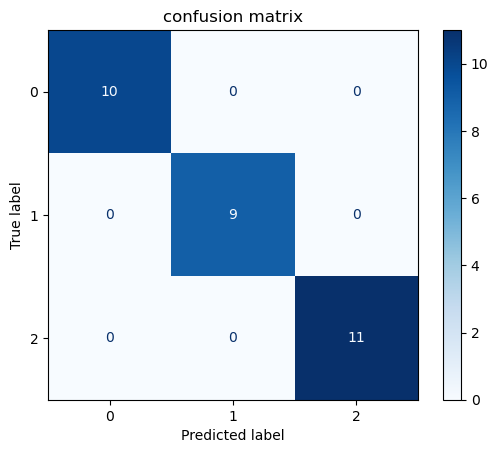

In [165]:
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot(cmap="Blues")
plt.title("confusion matrix")
plt.show()